In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

print("All libraries installed successfully!")

All libraries installed successfully!


In [20]:
import pandas as pd

# Load the dataset
df = pd.read_csv("older_models/older_data/stress_detection_data.csv")

# Display the first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Display data types of each column
print(df.dtypes)

   Age  Gender         Occupation Marital_Status  Sleep_Duration  \
0   30    Male  Software Engineer         Single             7.0   
1   35  Female  Marketing Manager        Married             6.0   
2   40    Male     Data Scientist       Divorced             7.0   
3   35    Male  Software Engineer         Single             7.0   
4   29  Female            Teacher         Single             8.0   

   Sleep_Quality Wake_Up_Time  Bed_Time  Physical_Activity  Screen_Time  ...  \
0            4.0      7:00 AM  10:00 PM                2.0          4.0  ...   
1            3.0      6:00 AM  11:00 PM                1.0          3.0  ...   
2            4.0      7:00 AM  10:00 PM                2.0          4.0  ...   
3            4.0      7:00 AM  10:00 PM                2.0          4.0  ...   
4            5.0      6:30 AM  10:30 PM                3.0          2.0  ...   

   Smoking_Habit  Work_Hours Travel_Time  Social_Interactions  \
0             No           8         1.0     

In [10]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Drop 'Wake_Up_Time' and 'Bed_Time' columns
df = df.drop(columns=["Wake_Up_Time", "Bed_Time"], errors='ignore')

# Initialize the label encoder
encoder = LabelEncoder()

# List of categorical columns to encode
categorical_columns = ["Gender", "Occupation", "Marital_Status", "Smoking_Habit", 
                       "Meditation_Practice", "Exercise_Type", "Stress_Detection"]

# Store the mappings in a dictionary for easy reference
mappings = {}

# Encode each column and store the mapping
for col in categorical_columns:
    df[col] = encoder.fit_transform(df[col])
    mappings[col] = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

# Print the mappings for reference
print("Category Mappings:")
for col, mapping in mappings.items():
    print(f"{col}: {mapping}\n")

# Check if the changes have been applied
print("\nUpdated DataFrame Preview:")
print(df.head())

Category Mappings:
Gender: {'Female': np.int64(0), 'Male': np.int64(1)}

Occupation: {'Account Manager': np.int64(0), 'Accountant': np.int64(1), 'Actor': np.int64(2), 'Advertising Executive': np.int64(3), 'Advertising Manager': np.int64(4), 'Architect': np.int64(5), 'Artist': np.int64(6), 'Baker': np.int64(7), 'Bakery Owner': np.int64(8), 'Bank Manager': np.int64(9), 'Banker': np.int64(10), 'Bartender': np.int64(11), 'Biologist': np.int64(12), 'Blacksmith': np.int64(13), 'Brand Manager': np.int64(14), 'Bus Driver': np.int64(15), 'Business Analyst': np.int64(16), 'Business Consultant': np.int64(17), 'Business Owner': np.int64(18), 'CEO': np.int64(19), 'Carpenter': np.int64(20), 'Chef': np.int64(21), 'Civil Engineer': np.int64(22), 'Civil Servant': np.int64(23), 'Cleaner': np.int64(24), 'Cobbler': np.int64(25), 'Construction Engineer': np.int64(26), 'Construction Manager': np.int64(27), 'Construction Worker': np.int64(28), 'Consultant': np.int64(29), 'Content Creator': np.int64(30), 'Con

In [11]:
from sklearn.model_selection import train_test_split

# Features (X) and target variable (y)
X = df.drop(columns=["Stress_Detection"])  # Features
y = df["Stress_Detection"]  # Target

# Split into training (80%) and testing (20%) datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)  # Check dataset size

(618, 19) (155, 19)


In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize and train the model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.61


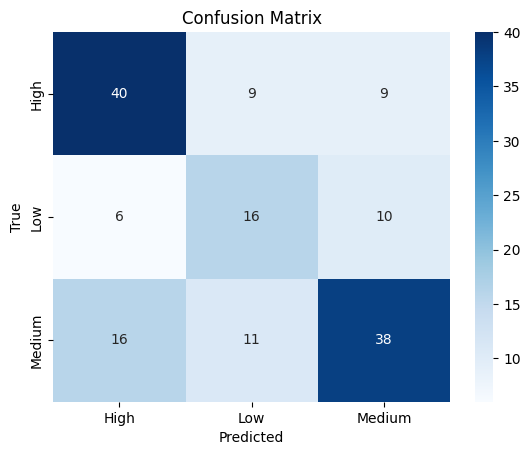

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_y_pred = rf_model.predict(X_test)

# Calculate accuracy
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print(f"Random Forest Model Accuracy: {rf_accuracy * 100:.2f}%")

# Generate classification report
print(classification_report(y_test, rf_y_pred))

Random Forest Model Accuracy: 77.42%
              precision    recall  f1-score   support

           0       0.84      0.84      0.84        58
           1       0.71      0.53      0.61        32
           2       0.74      0.83      0.78        65

    accuracy                           0.77       155
   macro avg       0.76      0.74      0.74       155
weighted avg       0.77      0.77      0.77       155



In [15]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,  # 5-fold cross-validation
                           n_jobs=-1,  # Use all available processors
                           verbose=0)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Evaluate the tuned model
best_rf_model = grid_search.best_estimator_
y_pred_tuned = best_rf_model.predict(X_test)
print(f"Tuned Random Forest Model Accuracy: {accuracy_score(y_test, y_pred_tuned) * 100:.2f}%")

Tuned Random Forest Model Accuracy: 76.77%


In [16]:
from sklearn.ensemble import VotingClassifier

# Initialize individual models
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)

# Combine models into a voting classifier
ensemble_model = VotingClassifier(estimators=[('dt', dt_model), ('rf', rf_model)], voting='hard')

# Train the ensemble model
ensemble_model.fit(X_train, y_train)

# Evaluate the ensemble model
ensemble_y_pred = ensemble_model.predict(X_test)
print(f"Ensemble Model Accuracy: {accuracy_score(y_test, ensemble_y_pred) * 100:.2f}%")

Ensemble Model Accuracy: 69.68%


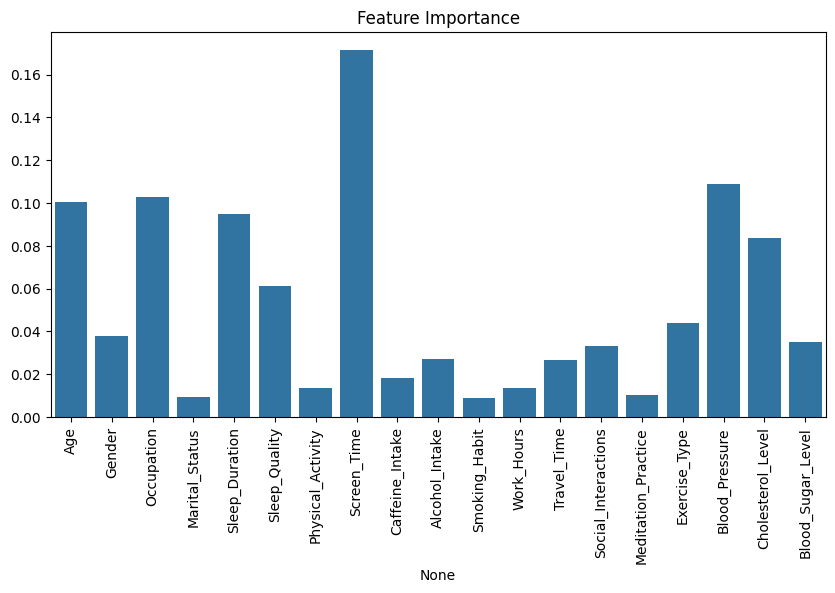

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importance
feature_importance = model.feature_importances_

# Plot feature importance
plt.figure(figsize=(10,5))
sns.barplot(x=X.columns, y=feature_importance)
plt.xticks(rotation=90)
plt.title("Feature Importance")
plt.show()

In [19]:
import joblib

# Save the trained model
joblib.dump(model, "stress_prediction_df_model.pkl")

# Load and use the model later
loaded_model = joblib.load("stress_prediction_df_model.pkl")
new_prediction = loaded_model.predict([[30,1,150,2,7.0,4.0,0,2.0,4.0,0,0,8,1.0,5,1,0,120,180,90]])
print("Predicted Stress Level:", new_prediction)

Predicted Stress Level: [1]


/Users/alvishprasla/VS_Code/Py/BioHacks/Biohack/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
